# Deep Learning via Adam

## Prerequisite knowledge
#### feed-forward Network Functions
The linear models for regression and classification are based on linear combinations of fixed nonlinear basis functions φj (x) and take the form 
$$ y(x,w)=f(\sum_{j=1}^Mw_j\phi_j(x))$$


This leads to the basic neural network model, which can be described a series of functional transformations. First we construct M linear combinations of the input variables x1,...,xD in the form 

$$ a_j=\sum_{i=1}^Dw_{ji}^{(1)}x_i+w_{j0}^{(1)}$$


The quantities aj are known as activations. Each of them is then transformed using a differentiable, nonlinear activation function h(·) to give these values are again linearly combined to give output unit activations

$$ z_j=h(a_j)$$


where k = 1, . . . , K, and K is the total number of outputs. 

We can combine these various stages to give the overall network function that, for sigmoidal output unit activation functions, takes the form 
$$ y_k(x,w)=\sigma(\sum_{j=1}^{M}w_{kj}^{(2)}h(\sum_{i=1}^{D}w_{ji}^{(1)}x_i+w_{j0}^{(1)})+w_{k0}^{(2)})$$

In [8]:
Network diagram for the two-layer neural network corresponding to. The input, hidden, and output variables are represented by nodes, and the weight parameters are rep- resented by links between the nodes, in which the bias parameters are denoted by links coming from additional input and hidden variables x0 and z0 . Arrows denote the direction of information flow through
the network during forward propagation. 

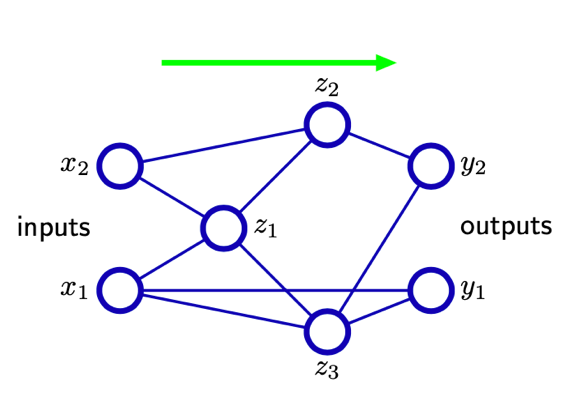

In [13]:
Example of a neural network having a general feed-forward topology. Note that each hidden and output unit has an associated bias parameter (omitted for clarity). 


## Problems To Be Solved
1.	Compare the learning rate (development of the loss function in the learning process) of a shallow neural network and several deep neural networks of equal complexity. 
2.	Which impact has the choice of the activation function (tanh or ReLU )? 


## Why Adam?
1.SGD is more effective than Gradient Descent when solving optimization problems, e.g., due to its inherent resilience to redundant data

2.Minibatch SGD affords significant additional efficiency arising from vectorization, using larger sets of observations in one minibatch. This is the key to efficient multi-machine, multi-GPU and overall parallel processing.

3.Momentum added a mechanism for aggregating a history of past gradients to accelerate convergence.

4.Adagrad used per-coordinate scaling to allow for a computationally efficient preconditioner.

5.RMSProp decoupled per-coordinate scaling from a learning rate adjustment.

Adam combines all these techniques into one efficient learning algorithm. As expected, this is an algorithm that has become rather popular as one of the more robust and effective optimization algorithms to use in deep learning.


## Algorithm Description
#### Require:

$\alpha $:step size

$\beta_1,\beta_2 \in [0,1]$:Expinential decay rates for the first moment estimates.

$f(\theta)$:stocahstic objective function with parameter $\theta$

$\theta_0$:Initial parameter vector.

$m_0 \leftarrow 0$ Initial $1^{st}$moment cector.

$v_0 \leftarrow 0$ Initial $2^{nd}$moment cector.

$t \leftarrow 0$ Initial time step.

#### While $\theta_t$ not converged do:

$t \leftarrow t+1 $
$ g_t \leftarrow \bigtriangledown_{\theta}f_t(\theta_{t-1}) $(Get gradient w.r.t. stochastic objective at timestep t)

$m_t \leftarrow \beta_1 \cdot m_{t-1}+(1-\beta_1)\cdot g_t$(Updata biased first moment estimate)

$v_t \leftarrow \beta_2\cdot b_{t-1}+(1-\beta_2)\cdot g_t^{2}$(Updata biased second raw moment estimate)

$\hat{m_t}\leftarrow m_t/(1-\beta_1^t) $(Compute bias-corrected first moment estimate)

$\hat{v_t}\leftarrow v_t/(1-\beta_2^t) $(Compute bias-corrected second raw moment estimate)

$\theta_t \leftarrow \theta_{t-1}-\alpha \cdot \hat{m_t}/(\sqrt{\hat{v_t}+\epsilon})$(Upadate parameters) 

#### end while

#### return $\theta_t$(resulting parameters)

The parameters take recommended values, that is：

$\alpha=0.001,\beta_1=0.9,\beta_2=0.99,\epsilon=10e-8$



## Implementation(coding) 

Data Generation

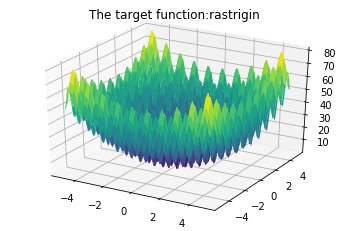

In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d 
import numpy as np
from casadi import *

x = SX.sym("x")
y = SX.sym("y")
A = 10.0
expr = 2*A + (x**2 - A * cos(2*pi*x)) + (y**2 - A * cos(2*pi*y))
fun = Function('fun',[x,y],[expr])
lb = [-5,-5]
ub = [5,5]
x_ls = np.linspace(lb,ub,100)
X, Y = np.meshgrid(x_ls[:,0],x_ls[:,1])
Z = np.array(fun(X,Y))
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.title('The target function:rastrigin')
plt.show()

#### Data preprocessing

1.split the data into training and test set

We need to split the model into training and test set so that we can build and test our model

The model is developed by using the training set and we use the test set to validate the accuracy of our model

Generally a 90:10 :: training:test split is considered ideal


2.Data standardization

$$
x^{'}=\frac{x-\bar{x}}{\sigma}
$$

In this technique, the values are normalized based on the mean and standard deviation.


### Build network with CasADi

#### Parameter expression
CasADi's symbolic expression allows us to quickly and easily perform automatic differentiation.Thanks to the powerful Python, especially the list data type. We can use it to represent many parameters.
$$ nodes = [2,18,8,12,15,14,1] $$

$$parameter=[nodes,w_0,...,w_{N-1},b_0,...,b_{N-1}]$$

$$weights=[w_0,...,w_{N-1}]$$

$$bias=[b_0,...,b_{N-1}]$$

$$gradient=[\frac{\partial y }{\partial w_0},...,\frac{\partial y }{\partial w_{N-1}},\frac{\partial y }{\partial b_0},...,\frac{\partial y }{\partial b_{N-1}}]$$

In this programm,we use lists to represent the network,e.g. $nodes=[2,3,1]$
which means a net work has 3 layers,the first is input layer with 2 neurons,the hidden layer has 3 neurons.And we use the library 'json' in python to save list data,which elements are arrays with different dimension.

#### Activation function
There are two activation functions:

1.relu-function:
$$f=max(x,0)$$


2.tanh-function:
$$f=\frac{e^{x}}{1+e^{x}}$$


#### Output of network
For a neural network,the output is :

$$ y=f_{N-2}...f_1(f_0(x\cdot w_0+b_0)\cdot w_1+b_1))\dot w_{N-1}+b_{N-1}  $$

#### Loss function : square loss 
To estimate the result of training:

$$min_\theta  \sum^{p}_{i=1}(\hat{y_i}-y_i)^2$$

## Comparsion of Results

In this project, we compared the performance of neural networks in different ways including shallow and deep neural networks, different activation functions, and different learning rates.The results show that these factors have different effects on the performance of the neural network, mainly the convergence performance and the final accuracy.All the comparisions take the warm start to make the initial loss values at two different methods approximately the same.These differences are shown below.

#### 1.Schallow and Deep NN

In this part we compare the performance of two neural networks with the same complexity, i.e. the same total number of neurons.Both neural networks have a total of 150 hidden neurons.

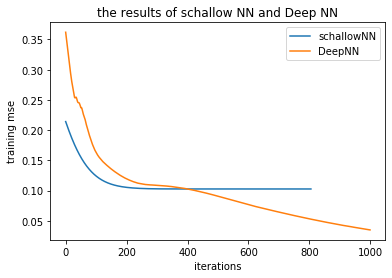

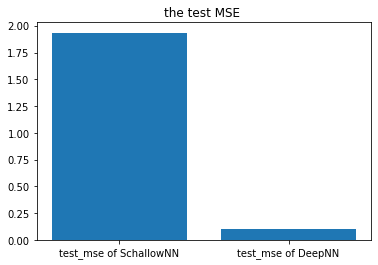

In [17]:
#load trained loss data.
loss1 = np.loadtxt('loss_schallow_relu_0.001.txt')
loss2 = np.loadtxt('loss_deep_relu_0.001.txt')
test1 = np.loadtxt('test_mse_schallow_relu_0.001.txt')
test2 = np.loadtxt('test_mse_deep_relu_0.001.txt')
test_list = [test1,test2]
name_list = ['test_mse of SchallowNN','test_mse of DeepNN']
#plot the results
plt.figure()

x1=[i for i in range(len(loss1))]
x2=[i for i in range(len(loss2))]
y1 = loss1
y2 = loss2
plt.plot(x1,y1,label='schallowNN')
plt.plot(x2,y2,label='DeepNN')
plt.xlabel('iterations')x
plt.ylabel('training mse')
plt.legend()
plt.title('the results of schallow NN and Deep NN')
plt.show()
plt.figure() 
plt.title('the test MSE ')
plt.bar(name_list,test_list)
plt.show()

Both networks use relu function and the learning rate for Adam algorithm is 0.001.In theory, a single-layer network with enough neurons can always fit a linear function with arbitrary precision. However, compared with deep networks with the same complexity, single-layer neural networks have worse convergence performance and requires more iterations. Correspondingly, deep networks with the same complexity converge faster and have relatively better accuracy, that is, MSE (mean squared error).
In addition, two different neural networks performed differently in the test set.It can be seen from the results that even if the single-layer neural network performs well on the training set, its mean square error in the test set may be very large. That is, single-layer neural networks are more prone to overfitting.

#### 2.Relu and tanh activation function
There are currently two major activation functions in the field of deep learning, relu and tanh, and their variants. In this project, we explored the similarities and differences between the two activation functions.

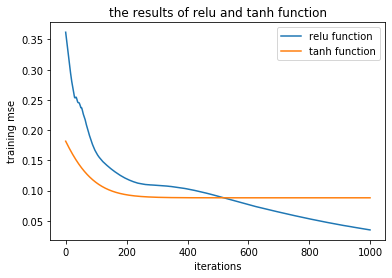

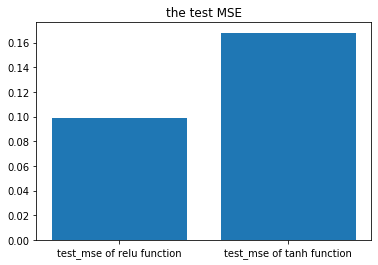

In [18]:
#load trained loss data.
loss1 = np.loadtxt('loss_deep_relu_0.001.txt')
loss2 = np.loadtxt('loss_deep_tanh_0.001.txt')
test1 = np.loadtxt('test_mse_deep_relu_0.001.txt')
test2 = np.loadtxt('test_mse_deep_tanh_0.001.txt')
test_list = [test1,test2]
name_list = ['test_mse of relu function','test_mse of tanh function']
#plot the results
plt.figure()
x1=[i for i in range(len(loss1))]
x2=[i for i in range(len(loss2))]
y1 = loss1
y2 = loss2
plt.plot(x1,y1,label='relu function')
plt.plot(x2,y2,label='tanh function')
plt.xlabel('iterations')
plt.ylabel('training mse')
plt.legend()
plt.title('the results of relu and tanh function')
plt.show()
plt.figure() 
plt.title('the test MSE')
plt.bar(name_list,test_list)
plt.show() 

As far as the results are concerned, the impact of the two activation functions on network performance is basically the same.As the most popular activation function today, relu function has the advantages of easy calculation and fast convergence.In contrast, the tanh activation function converges more slowly. Although the relu activation function has greatly improved the gradient vanishing problem of the sigmoid function, in practice, the relu activation function still causes the gradient vanishing problem. The tanh activation function rarely has this problem.

#### 3.Different learning rate 

For gradient descent algorithms, the choice of learning rate is extremely important. So we compared the performance at different learning rates. 

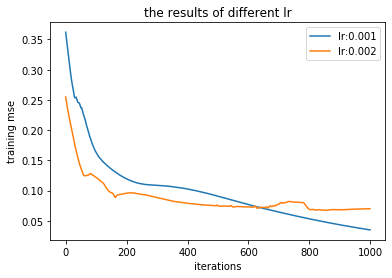

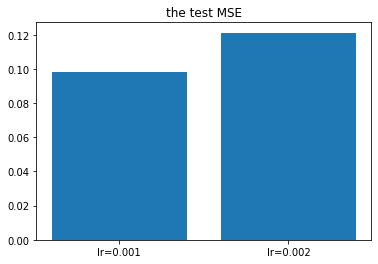

In [19]:
#load trained loss data.
loss1 = np.loadtxt('loss_deep_relu_0.001.txt')
loss2 = np.loadtxt('loss_deep_relu_0.002.txt')
test1 = np.loadtxt('test_mse_deep_relu_0.001.txt')
test2 = np.loadtxt('test_mse_deep_relu_0.002.txt')
test_list = [test1,test2]
name_list = ['lr=0.001','lr=0.002']
#plot the results
plt.figure()
x1=[i for i in range(len(loss1))]
x2=[i for i in range(len(loss2))]
y1 = loss1
y2 = loss2
plt.plot(x1,y1,label='lr:0.001')
plt.plot(x2,y2,label='lr:0.002')
plt.xlabel('iterations')
plt.ylabel('training mse')
plt.legend()
plt.title('the results of different lr')
plt.show()
plt.figure() 
plt.title('the test MSE')
plt.bar(name_list,test_list)
plt.show()

After using Adam's algorithm, a larger learning rate does not seem to mean faster descent, but the learning process will be full of oscillations. The Adam algorithm can adaptively adjust the learning step size, so there is no need to specifically adjust the learning rate, and the default value of 0.001 can be used.

## Summary 
Adam is a very popular algorithm in the field of deep learning because it can achieve good results quickly. According to the results of this project, the Adam algorithm has been proved to perform well in practice.In particular, the Adam algorithm has the following advantages: 

1.It is simple to implement and does not require complicated programming.

2.Efficient calculations and low memory requirements.

3.Hyperparameters can be explained very intuitively, and there is not much to adjust for hyperparameters.



## Some Supplement
Some people say that deep learning is a process of constantly adjusting parameters, and actually it is true.Because neural networks can be designed arbitrarily, with fewer prior assumptions, more parameters, and more hyperparameters, the degree of freedom of the model is very high.Here are some measures we used to improve the learning.

####  Preprocessing Data 
There are some good reasons that you should do the preprocessing:

1.Treat each feature fairly.You don't know which one is more important.

2.Smooth the optimization process.

3.Eliminate dimensional effects.

In this project, we standardized the data to improve learning performance.Normally, the features of all inputs are independently standardized according to the same rules. If there are special requirements for the task, some features can be treated specificly.

#### Don't use too large batch-size

There are 2 reasons:

Reason 1: Jump out of local minimum during training

Reason 2: Make the training reach a relatively smooth local minimum, and improve generalization

If you can tolerate long time training , it's better to start with the smallest batch size (16,8,1).

#### Activation function for the last layer

Limit the range of the output, generally without any activation. Need to carefully consider what the input is and the range of the output value after normalization. If the output is positive or negative, you use ReLU, sigmoid will obviously not work.

#### Initialization of parameter

If the weight is too small, the signal transmission gradually decreases and it is difficult to have effect.

If the weight is too large, the signal transmission gradually enlarges, leading to divergence and failure.

The more popular initialization methods for weights are 'he', 'lecun', 'Xavier'.The biases are generally initialized to 0.

#### Avoid overfitting
Overfitting means that our model has poor generalization ability, which is not what we want. After learning some data, your model may perform well, but may not perform equally well on other data.

#### How to know it is overfitting or not ?

Just like students life, your model should be tested once it has been learned.We divide the data set into training and test sets, which are 90% and 10% respectively.Only when the training and test sets perform well can the model be said to be excellent.

#### Some methods
1.Dividing the data into training and test sets.
2.Train as much as possible.
The given program only provided 1000 pairs of data points, we doubled this number to 2000 .
3.Don't use too complex networks.
For easy problems,the network should not be too deep.And the neurons of hidden layers can be a small number.